# 3. DBSCAN

In [79]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

## Download the credit card dataset.

In [80]:
data = pd.read_csv(r'C:\Users\Shivali Muthukumar\Desktop\IRIS.csv', encoding= 'unicode_escape')
data = data.drop('sepal_length', axis = 1)
data.fillna(method ='ffill', inplace = True)
print(data.head())

   sepal_width  petal_length  petal_width  species
0          3.5           1.4          0.2        0
1          3.0           1.4          0.2        0
2          3.2           1.3          0.2        0
3          3.1           1.5          0.2        0
4          3.6           1.4          0.2        0


## Preprocessing

In [81]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_normalized = normalize(data_scaled)
data_normalized = pd.DataFrame(data_normalized)

In [82]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']
print(data_principal.head())

         P1        P2
0  1.162108  0.182707
1  1.098770 -0.293948
2  1.153893 -0.098158
3  1.131016 -0.197069
4  1.149668  0.263273


## Apply DBSCAN algorithm to make clusters to identify dense region using the dataset.

In [83]:
db_default = DBSCAN(eps = 0.05, min_samples = 5).fit(data_principal)
labels = db_default.labels_

## Visualization

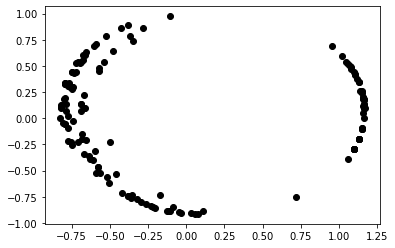

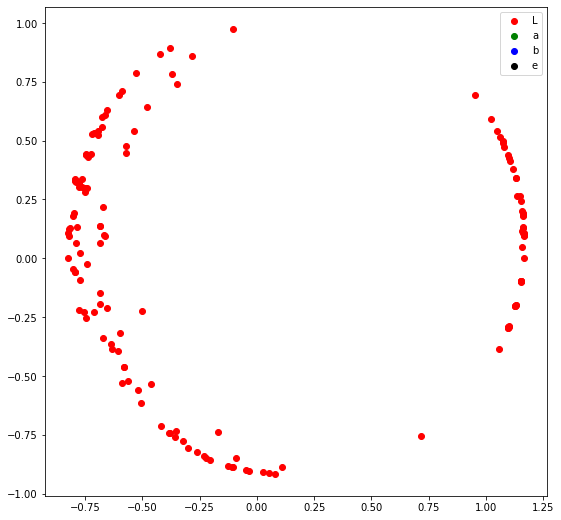

In [84]:
k = plt.scatter(data_principal['P1'], data_principal['P2'], color ='k');
plt.figure(figsize =(9, 9))
plt.scatter(data_principal['P1'], data_principal['P2'], c = 'red')
plt.legend((r,g,b,k), ('Label -1'))
plt.show()

## Tuning the parameters of the model

In [85]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(data_principal)
labels1 = db.labels_

## Visualizing changes

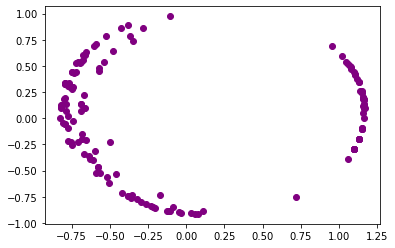

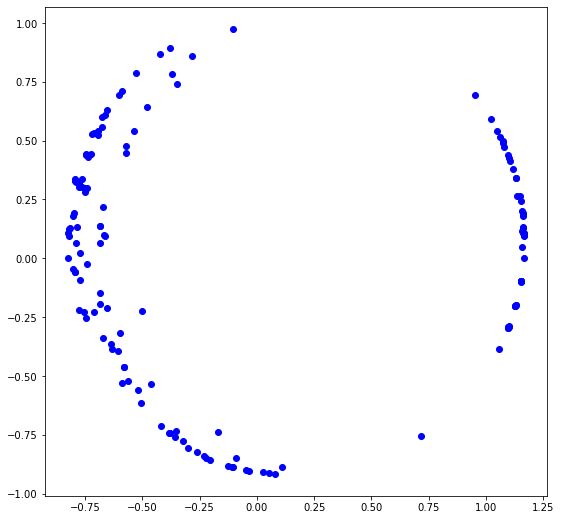

In [86]:
k = plt.scatter(data_principal['P1'], data_principal['P2'], marker ='o', color = 'purple')
colors = ['blue']
plt.figure(figsize =(9, 9))
plt.scatter(data_principal['P1'], data_principal['P2'], c=colors)
plt.show()